In [5]:

# Dependencies

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy.stats as st
from config import api_key




In [6]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [7]:
url='https://api.yelp.com/v3/businesses/search'
 
# paramaters
params = {'term':'music venue','location':'Denver','radius':20000,'limit':50}

In [8]:
response=requests.get(url, params=params, headers=headers).json()
 
# proceed only if the status code is 200
#print('The status code is {}'.format(response.status_code))

In [9]:
params2 = {'term':'music venue','location':'Denver','radius':20000,'limit':50,'offset':50}
response2=requests.get(url, params=params2, headers=headers).json()
response2

{'businesses': [{'id': 'fqVkNpn43o-XWxHJfFpBbg',
   'alias': 'the-church-denver-2',
   'name': 'The Church',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/4VZ2GeiUfwAXvh6Hv7gjKA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/the-church-denver-2?adjust_creative=nC2mzMNmRx08dqWbq5LVeQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=nC2mzMNmRx08dqWbq5LVeQ',
   'review_count': 120,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'musicvenues', 'title': 'Music Venues'},
    {'alias': 'danceclubs', 'title': 'Dance Clubs'}],
   'rating': 3.0,
   'coordinates': {'latitude': 39.735043, 'longitude': -104.9857619},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '1160 Lincoln St',
    'address2': '',
    'address3': '',
    'city': 'Denver',
    'zip_code': '80203',
    'country': 'US',
    'state': 'CO',
    'display_address': ['1160 Lincoln St', 'Denver, CO 80203']},
   'phone': '+13038323528',
   'dis

In [10]:
busId=[]
busName=[]
address=[]
phoneNum=[]
review_count=[]
rating=[]
priceLevel=[]
numOfCategories=[]
categories=[]
distance=[]
noPriceData=[]

for x in range(len(response['businesses'])):
    subList=[]
    for i in range(len(response['businesses'][x]['categories'])):
        subList.append(response['businesses'][x]['categories'][i]['title'])
    categories.append(subList)
    busId.append(response['businesses'][x]['id'])
    busName.append(response['businesses'][x]['name'])
    address.append(response['businesses'][x]['location']['display_address'])
    phoneNum.append(response['businesses'][x]['display_phone'])    
    numOfCategories.append(len(response['businesses'][x]['categories']))
    try:
        priceLevel.append(response['businesses'][x]['price'])    
    except:
        priceLevel.append('N/A')
        noPriceData.append(response['businesses'][x]['id'])
    try:
        review_count.append(response['businesses'][x]['review_count'])
        distance.append(response['businesses'][x]['distance'])
        rating.append(response['businesses'][x]['rating'])
    except:
        print(f"Could not access all the information for {response['businesses'][x]['name']}")
        del categories[-1]
        del busId[-1]
        del busName[-1]
        del address[-1]
        del phoneNum[-1]
        del numOfCategories[-1]
        
for x in range(len(response2['businesses'])):
    subList=[]
    for i in range(len(response2['businesses'][x]['categories'])):
        subList.append(response2['businesses'][x]['categories'][i]['title'])
    categories.append(subList)
    busId.append(response2['businesses'][x]['id'])
    busName.append(response2['businesses'][x]['name'])
    address.append(response2['businesses'][x]['location']['display_address'])
    phoneNum.append(response2['businesses'][x]['display_phone'])    
    numOfCategories.append(len(response2['businesses'][x]['categories']))
    try:
        priceLevel.append(response2['businesses'][x]['price'])    
    except:
        priceLevel.append('N/A')
        noPriceData.append(response2['businesses'][x]['id'])
    try:
        review_count.append(response2['businesses'][x]['review_count'])
        distance.append(response2['businesses'][x]['distance'])
        rating.append(response2['businesses'][x]['rating'])
    except:
        print(f"Could not access all the information for {response['businesses'][x]['name']}")
        del categories[-1]
        del busId[-1]
        del busName[-1]
        del address[-1]
        del phoneNum[-1]
        del numOfCategories[-1]
        

In [11]:
businessDataDF=pd.DataFrame({"ID":busId,"Name":busName,"Address":address,"Phone Number":phoneNum,"Review Count":review_count,
                            "Rating":rating,"Price Level":priceLevel,"Number of Categories":numOfCategories,
                            "Categories":categories,"Distance from Denver":distance})
businessDataDF.head(50)

,ID,Name,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
0,0IqSfcno328kCD374Q7R7g,Your Mom's House,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,$,3,"[Music Venues, Dance Clubs, Bars]",803.903839
1,_UXWmagvPB86UA3PE2revA,Ogden Theatre,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,$$,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
2,oAWkAw_C5ByIZQubcVgIBw,Bluebird Theater,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,$$,2,"[Performing Arts, Music Venues]",1947.117349
3,m6hFStjFi3KfRXf4v777Cw,Mission Ballroom,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,N/A,1,[Music Venues],4524.650241
4,8WGzLAv1Mu_R9amiMz6RuQ,The Soiled Dove Underground,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,$$,2,"[Music Venues, Venues & Event Spaces]",6189.800684
5,TYf0Pii-XhKvwwnOhVo28g,Fillmore Auditorium,"[1510 Clarkson St, Denver, CO 80218]",(303) 837-0360,180,3.0,$$,2,"[Music Venues, Performing Arts]",816.350841
6,c3QuHjgIkESyn_eD4EiACA,Nocturne,"[1330 27th St, Denver, CO 80205]",(303) 295-3333,265,4.5,$$$,3,"[Jazz & Blues, American (New), Cocktail Bars]",2947.340041
7,hrnBaK2NCvu9NGU4m8dGRw,Larimer Lounge,"[2721 Larimer St, Denver, CO 80205]",(303) 291-1007,123,3.5,$,3,"[Lounges, Music Venues, Cocktail Bars]",2954.775203
8,4LiJ9Yz_OpKbCBbfLCj0yw,The Walnut Room,"[3131 Walnut St, Denver, CO 80205]",(303) 295-1868,253,3.5,$$,3,"[Pizza, Music Venues, Bars]",3311.806647
9,DP1dL3wAp2yzKJ6Z2mr-UQ,Herb's Hideout,"[2057 Larimer St, Denver, CO 80205]",(303) 299-9555,95,4.0,$,3,"[Lounges, Music Venues, Dive Bars]",2751.120908


In [59]:
newPriceLevel=businessDataDF['Price Level'].values.tolist()
for x in range(len(newPriceLevel)):
    if newPriceLevel[x]=="$":
        newPriceLevel[x]=1
    elif newPriceLevel[x]=="$$":
        newPriceLevel[x]=2
    elif newPriceLevel[x]=="$$$":
        newPriceLevel[x]=3
    elif newPriceLevel[x]=="$$$$":
        newPriceLevel[x]=4
    else:
        newPriceLevel[x]=0
businessDataDF["Price Level"]=newPriceLevel
businessDataDF

,ID,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
Name,,,,,,,,,
Your Mom's House,0IqSfcno328kCD374Q7R7g,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,0,3,"[Music Venues, Dance Clubs, Bars]",803.903839
Ogden Theatre,_UXWmagvPB86UA3PE2revA,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,0,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
Bluebird Theater,oAWkAw_C5ByIZQubcVgIBw,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,0,2,"[Performing Arts, Music Venues]",1947.117349
Mission Ballroom,m6hFStjFi3KfRXf4v777Cw,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,0,1,[Music Venues],4524.650241
The Soiled Dove Underground,8WGzLAv1Mu_R9amiMz6RuQ,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,0,2,"[Music Venues, Venues & Event Spaces]",6189.800684
...,...,...,...,...,...,...,...,...,...
Kinga's Lounge,whMF9UFpUrtalDgqr_yENw,"[1509 Marion St, Denver, CO 80218]",(303) 830-6922,260,3.5,0,3,"[Lounges, Polish, Breakfast & Brunch]",560.649865
Rocky Mountain Recorders,r4Z1NIAjwK4g6Za2CUYkWw,"[1250 W Cedar Ave, Denver, CO 80223]",(303) 777-3648,1,5.0,0,1,[Recording & Rehearsal Studios],3752.953904
Trattoria Stella on Colfax,QgLBYDNHkj7Ju0Pcy7Tp5Q,"[3201 E Colfax Ave, Denver, CO 80206]",(303) 320-8635,346,4.0,0,3,"[Italian, Bars, Venues & Event Spaces]",1841.844710


In [13]:
businessDataDF.to_csv("Business_Data.csv", encoding="utf-8", index=False)

Text(0, 0.5, 'Rating')

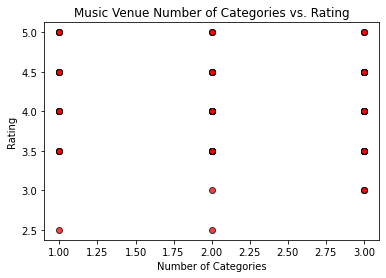

In [30]:
plt.scatter(businessDataDF['Number of Categories'], businessDataDF['Rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Number of Categories vs. Rating")
plt.xlabel("Number of Categories")
plt.ylabel("Rating")

In [31]:
correlation=st.linregress(businessDataDF['Number of Categories'],businessDataDF['Rating'])
correlation

LinregressResult(slope=-0.029785809906291847, intercept=4.1091030789825975, rvalue=-0.04180294894282459, pvalue=0.6796400118869346, stderr=0.07191337348454162)

Text(0, 0.5, 'Rating')

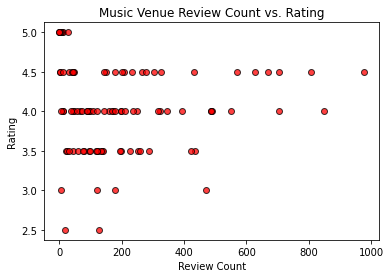

In [24]:
plt.scatter(businessDataDF['Review Count'], businessDataDF['Rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Review Count vs. Rating")
plt.xlabel("Review Count")
plt.ylabel("Rating")

In [25]:
correlation=st.linregress(businessDataDF['Review Count'],businessDataDF['Rating'])
correlation

LinregressResult(slope=3.0264903758058808e-05, intercept=4.034005127863604, rvalue=0.011547688994197088, pvalue=0.9092149259433812, stderr=0.0002647294285745377)

Text(0, 0.5, 'Price Level')

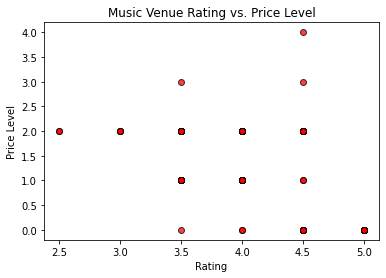

In [26]:
plt.scatter(businessDataDF['Rating'], businessDataDF['Price Level'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Rating vs. Price Level")
plt.xlabel("Rating")
plt.ylabel("Price Level")

In [27]:
correlation=st.linregress(businessDataDF['Rating'],businessDataDF['Price Level'])
correlation

LinregressResult(slope=-0.5926170072511535, intercept=3.76417270929466, rvalue=-0.3812416051679814, pvalue=9.102274092830226e-05, stderr=0.1451630757328973)

Text(0, 0.5, 'Review Count')

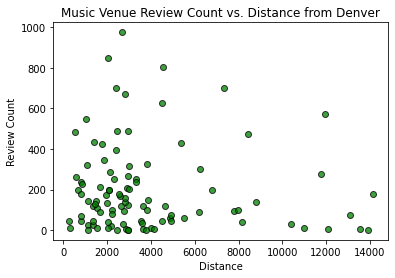

In [28]:
plt.scatter(businessDataDF['Distance from Denver'], businessDataDF['Review Count'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Music Venue Review Count vs. Distance from Denver")
plt.xlabel("Distance")
plt.ylabel("Review Count")

In [29]:
correlation=st.linregress(businessDataDF['Distance from Denver'],businessDataDF['Review Count'])
correlation

LinregressResult(slope=-0.004036619086212261, intercept=213.56775224845148, rvalue=-0.0633383598752278, pvalue=0.5312824968403715, stderr=0.00642488008231108)

In [18]:
#Create empty dictionary
catDict={}
#Save Categories column from DF into list of lists
categoryTypes=businessDataDF['Categories'].values.tolist()

In [19]:
#iterate through each list
for x in range(len(categoryTypes)):
    length=len(categoryTypes[x])
    #iterate through each item in the list
    for i in range(length):
        #check if the category is in the dictionary
        if categoryTypes[x][i] in catDict:
            #if so,add one to the count
            catDict[categoryTypes[x][i]]+=1
        #if not in the dictionary
        else:
            #add to dictionary and set count to 1
            catDict[categoryTypes[x][i]]=1
catDict

{'Music Venues': 37,
 'Dance Clubs': 8,
 'Bars': 30,
 'Venues & Event Spaces': 13,
 'Performing Arts': 10,
 'Jazz & Blues': 3,
 'American (New)': 11,
 'Cocktail Bars': 16,
 'Lounges': 11,
 'Pizza': 5,
 'Dive Bars': 6,
 'DJs': 3,
 'Breakfast & Brunch': 7,
 'Comedy Clubs': 2,
 'Cinema': 1,
 'Burgers': 3,
 'Barbeque': 1,
 'Italian': 3,
 'Wine Bars': 6,
 'Country Dance Halls': 1,
 'Gastropubs': 1,
 'Pubs': 4,
 'Cajun/Creole': 2,
 'Beer Bar': 2,
 'Breweries': 2,
 'American (Traditional)': 8,
 'Recording & Rehearsal Studios': 2,
 'Coffee & Tea': 2,
 'Tiki Bars': 1,
 'Hawaiian': 1,
 'Art Galleries': 1,
 'Arcades': 1,
 'Mexican': 3,
 'Seafood': 2,
 'Steakhouses': 2,
 'Sandwiches': 3,
 'Wine Tasting Room': 1,
 'Sports Bars': 2,
 'Whiskey Bars': 2,
 'Tapas/Small Plates': 1,
 'Irish Pub': 1,
 'Gay Bars': 1,
 'Dance Studios': 1,
 'Hotels': 1,
 'Museums': 1,
 'Musicians': 1,
 'Food Court': 1,
 'Food Stands': 1,
 'Beer Gardens': 1,
 'Speakeasies': 1,
 'Polish': 1,
 'Wedding Planning': 1}

In [20]:
#convert catDict to lists for plotting
catList=list(catDict.keys())
catNums=list(catDict.values())

Text(0, 0.5, 'Frequency')

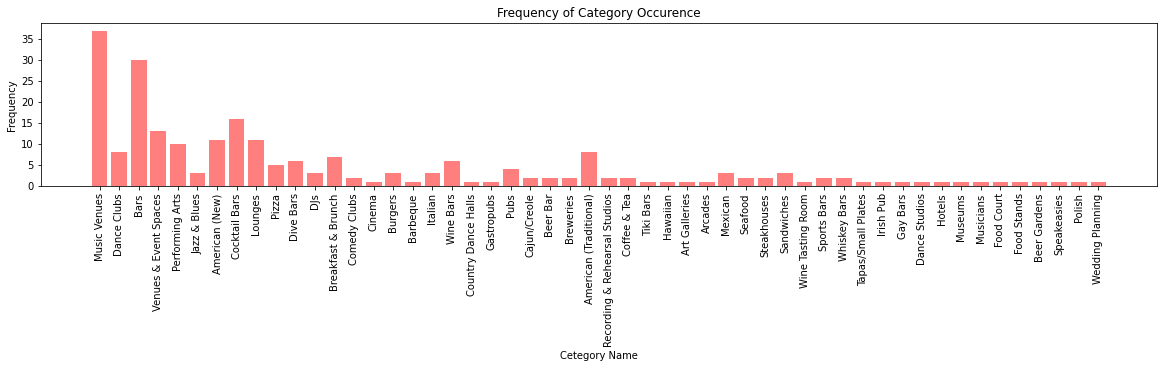

In [23]:
plt.figure(figsize=(20,3))
plt.bar(catList, catNums, color='r', alpha=0.5, align="center")
plt.xticks(catList, rotation="vertical")
plt.title("Frequency of Category Occurence")
plt.xlabel("Cetegory Name")
plt.ylabel("Frequency")

In [51]:
catDF=pd.DataFrame({"Category":catList,"Frequency":catNums})
catDF.sort_values(by=['Frequency'], inplace=True, ascending=False)
catDF.reset_index()
mostFreqCatList=[]
for x in range(15):
    mostFreqCatList.append(catDF.at[x,"Category"])
mostFreqCatList

['Music Venues',
 'Dance Clubs',
 'Bars',
 'Venues & Event Spaces',
 'Performing Arts',
 'Jazz & Blues',
 'American (New)',
 'Cocktail Bars',
 'Lounges',
 'Pizza',
 'Dive Bars',
 'DJs',
 'Breakfast & Brunch',
 'Comedy Clubs',
 'Cinema']

In [88]:
businessDataDF.set_index("ID", drop=False)
topVenues=[]
otherVenues=[]
for venue in businessDataDF["ID"]:
    if len(set(mostFreqCatList).intersection(set(businessDataDF.loc[venue,"Categories"])) > 0:
        topVenues.append([businessDataDF.loc[venue,:].tolist()])
    else:
        othereVenues.append(businessDataDF.loc[venue,:].tolist())
topCatVenues=pd.DataFrame(topVenues,columns=["Name","Address","Address","Phone Number","Review Count","Rating","Price Level","Number of Categories","Categories","Distance from Denver"])
otherCatVenues=pd.DataFrame(otherVenues,columns=["Name","Address","Address","Phone Number","Review Count","Rating","Price Level","Number of Categories","Categories","Distance from Denver"])

SyntaxError: invalid syntax (<ipython-input-88-dd5a3f8ad973>, line 5)

In [85]:
businessDataDF

,ID,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
Name,,,,,,,,,
Your Mom's House,0IqSfcno328kCD374Q7R7g,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,0,3,"[Music Venues, Dance Clubs, Bars]",803.903839
Ogden Theatre,_UXWmagvPB86UA3PE2revA,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,0,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
Bluebird Theater,oAWkAw_C5ByIZQubcVgIBw,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,0,2,"[Performing Arts, Music Venues]",1947.117349
Mission Ballroom,m6hFStjFi3KfRXf4v777Cw,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,0,1,[Music Venues],4524.650241
The Soiled Dove Underground,8WGzLAv1Mu_R9amiMz6RuQ,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,0,2,"[Music Venues, Venues & Event Spaces]",6189.800684
...,...,...,...,...,...,...,...,...,...
Kinga's Lounge,whMF9UFpUrtalDgqr_yENw,"[1509 Marion St, Denver, CO 80218]",(303) 830-6922,260,3.5,0,3,"[Lounges, Polish, Breakfast & Brunch]",560.649865
Rocky Mountain Recorders,r4Z1NIAjwK4g6Za2CUYkWw,"[1250 W Cedar Ave, Denver, CO 80223]",(303) 777-3648,1,5.0,0,1,[Recording & Rehearsal Studios],3752.953904
Trattoria Stella on Colfax,QgLBYDNHkj7Ju0Pcy7Tp5Q,"[3201 E Colfax Ave, Denver, CO 80206]",(303) 320-8635,346,4.0,0,3,"[Italian, Bars, Venues & Event Spaces]",1841.844710
